## BCR-ABL inhibition by dasatinib

In [1]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar import config, helpers
from kstar.plot import DotPlot

import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Supplements/SupplementaryData/Control_Experiments/BCR_ABL_K562_Asmussen2014/'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/BCR-ABL_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/BCR-ABL_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)

        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

In [3]:
#Make a dictionary for labeling 
x_label_dict = {}
x_label_dict['data:treated_to_untreated:EOE(drug washout)'] = 'EOE'
x_label_dict['data:treated_to_untreated:HDP3(3hrs post treatment)'] = 'HDP3'
x_label_dict['data:treated_to_untreated:HDP6(6hrs post treatment)'] = 'HDP6'
x_label_dict['data:treated_to_untreated:pre-treatment'] = 'PRE'

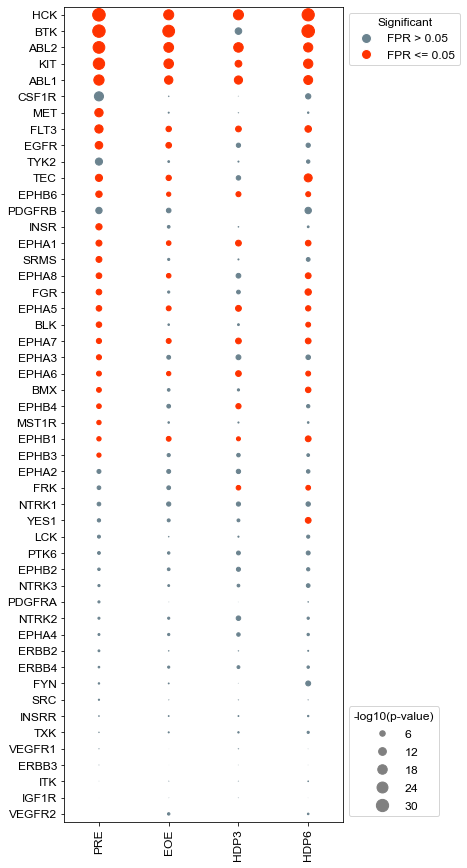

In [4]:

results = activities
results = results[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]
results = results.sort_values('data:treated_to_untreated:pre-treatment', ascending=True)

results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (5, 15))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (5,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict=x_label_dict,
                      kinase_dict=kinase_dict)
#dots.drop_kinases_with_no_significance()
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
#dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(axes)
plt.savefig(odir+'BCR-ABL_all.pdf', bbox_inches='tight')

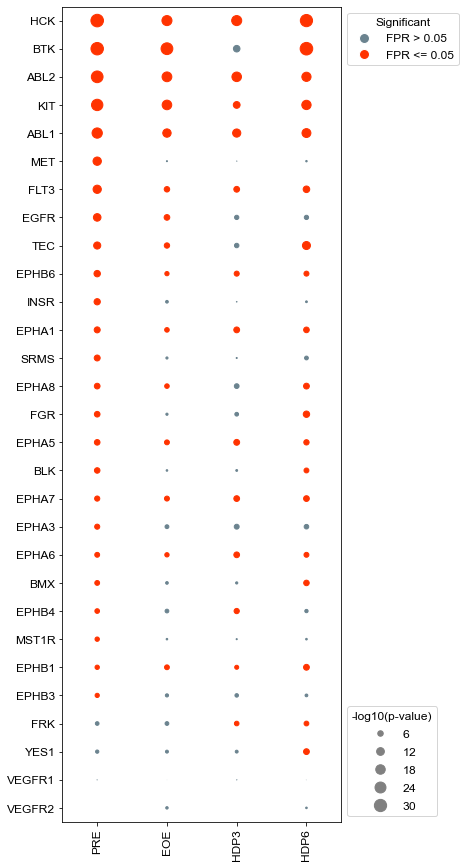

In [4]:

results = activities
results = results[['data:treated_to_untreated:pre-treatment', 
                  'data:treated_to_untreated:EOE(drug washout)', 
                  'data:treated_to_untreated:HDP3(3hrs post treatment)',
                  'data:treated_to_untreated:HDP6(6hrs post treatment)']]
results = results.sort_values('data:treated_to_untreated:pre-treatment', ascending=True)

results = -np.log10(results)


#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (5, 15))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (5,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      x_label_dict=x_label_dict,
                      kinase_dict=kinase_dict)
dots.drop_kinases_with_no_significance()
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
#dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(axes)
plt.savefig(odir+'BCR-ABL_SigKinases.pdf', bbox_inches='tight')

In [10]:
kplot?

In [ ]:
kplot